# Planting a Winery: Comparing California Wine Countries

We are interested in opening a winery in California, and we compared Napa Valley and San Diego to make the most profitable decision. We reviewed data from the Yelp API to guide our decision. We used API requests to gather the data, then parsed and cleaned the data to collect the most relevant data for analysis. After reviewing our statistical analysis and comparing data between the regions, we decided that San Diego would be the better area.

# Business Problem

We want to open a winery, and we know that Napa Valley is one of the best-known locations for wineries. We also want to investigate a lesser-known region for other opportunities. We chose San Diego as it is in southern California, away from Napa Valley to the north.

***
We needed to consider:
- **Q1: What do the regions look like statistically?**
  - Are there any strong relationships between the statistics?
  - Are there any clusters of businesses in each area?
  
  
- **Q2: What are the price
ranges for each area?**
    - Lower prices may be more broadly appealing
    - Higher pricing targets more discerning, luxury clientele
        
        
- **Q3: Ratings**
 - How satisfied are the customers in each area?
   - Unsatisfied customers indicate oportunities to steal their business from the other wineries
 - Are there more satisfied customers in one region vs. the other?
 
 
- **Q4: Number of reviews**
 - May indicate the popularity of businesses
   - More popular businesses may have more reviews
 - Larger review counts may indicate larger volumes of visitors to the area

# Exploring, Analyzing, and Interpreting Results

In our previous notebook(`NOTEBOOK NAME`), we collected data from the Yelp API for our two regions of interest, Napa Valley and San Diego. We used that data to gain insight into our markets. 

Some of the data represented includes:
- The average rating per business
- Total number of reviews per business
- Pricing per business 
- The location for each business

First, we will import our packages and load in the data for each respective region. Then, we will combine them for analysis.

# Importing Packages

In [2]:
# Accessing stored data
import csv
import json

# Data exploration and statistics
import pandas as pd
import numpy as np

# Creating Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

## San Diego Wineries

In [3]:
# Read in data from the San Diego .csv
df_sd_details = pd.read_csv("data/wineries_San_Diego_price_converted.csv")
df_sd_details.reset_index(drop=True, inplace=True)
df_sd_details['City'] = 'San Diego'

## Napa Valley Wineries

In [4]:
# Read in data from the Napa Valley .csv
df_nv_details = pd.read_csv("data/wineries_Napa Valley_price_converted.csv")
df_nv_details.reset_index(drop=True, inplace=True)
df_nv_details['City'] = 'Napa Valley'

## Combined Data for Both Regions

In [5]:
# Concatenating the two dataframes into one
combined = pd.concat([df_sd_details, df_nv_details], ignore_index = 0)
combined

,name,location,Business ID,alias,title,rating,review_count,price,latitude,longitude,City,price_converted
0,Bernardo Winery,"13330 Paseo Del Verano Norte San Diego, CA 92128",DknnpiG1p4OoM1maFshzXA,winetastingroom,Wine Tasting Room,4.5,626,$$,33.032800,-117.046460,San Diego,2
1,Callaway Vineyard & Winery,"517 4th Ave Ste 101 San Diego, CA 92101",Cn2_bpTngghYW1ej4zreZg,winetastingroom,Wine Tasting Room,5.0,100,$$,32.710751,-117.160918,San Diego,2
2,San Pasqual Winery - Seaport Village,"805 W Harbor Dr San Diego, CA 92101",gMW1RvyLu90RSQAY9UrIHw,winetastingroom,Wine Tasting Room,4.5,138,$$,32.708732,-117.168195,San Diego,2
3,Négociant Winery,"2419 El Cajon Blvd San Diego, CA 92104",Cc1sQWRWgGyMCjzX2mmMQQ,winetastingroom,Wine Tasting Room,4.5,103,$$,32.754880,-117.138280,San Diego,2
4,Domaine Artefact Vineyard & Winery,"15404 Highland Valley Rd Escondido, CA 92025",WqVbxY77Ag96X90LultCUw,wineries,Wineries,5.0,96,$$,33.068170,-117.001600,San Diego,2
...,...,...,...,...,...,...,...,...,...,...,...,...
398,Andretti Winery,"1625 Trancas St Ste 3017 Napa, CA 94558",NKCMqIlRopcSMA15JpeyJg,wineries,Wineries,3.5,311,$$,38.321516,-122.304108,Napa Valley,2
399,Lionstone International,"21481 8th St E Sonoma, CA 95476",pW9QPUkm2_tTXLCzyQ6qvg,wineries,Wineries,1.0,1,$$,38.262062,-122.442036,Napa Valley,2
400,Napa Vinyards,"Napa, CA 94558",UwgQWRkTzlFnw3-QYCaBlQ,wineries,Wineries,1.0,1,$$,38.383260,-122.313060,Napa Valley,2
401,Cook Vinyard Management,"19626 Eighth St E Sonoma, CA 95476",LxMkyxBokxu6iRIsuMF5Tw,wineries,Wineries,1.0,1,$$,38.286261,-122.434893,Napa Valley,2


# Data Exploration

Now that we collected the data, we will begin with our statistical overview of the data.

In [50]:
# Concentrating statistical overview and comparing between cities
combined.groupby('City')[['rating','review_count','price_converted']].describe().T

City                   Napa Valley   San Diego
rating          count   403.000000   82.000000
                mean      4.555831    4.530488
                std       0.696462    0.594977
                min       1.000000    1.000000
                25%       4.500000    4.500000
                50%       5.000000    4.500000
                75%       5.000000    5.000000
                max       5.000000    5.000000
review_count    count   403.000000   82.000000
                mean     85.382134   63.743902
                std     195.580404  102.770367
                min       1.000000    1.000000
                25%       3.000000    7.000000
                50%      14.000000   26.000000
                75%      73.500000   93.500000
                max    2239.000000  626.000000
price_converted count   403.000000   82.000000
                mean      2.220844    1.975610
                std       0.521538    0.220863
                min       1.000000    1.000000
                25%       2.000000    2.000000
                50%       2.000000    2.000000
                75%       2.000000    2.000000
                max       4.000000    3.000000

**A1:** Based on these statistics, we can take away a few insights:

- Despite a large difference between number of ratings and reviews, the average of ratings and reviews are close between the two regions.
    - The data is heavily skewed in the case of Napa Valley's reviews - their max number of reviews for one business is nearly 2300, artificially increasing their average.
        - Considering the median number of reviews is 14 for Napa Valley and 36 for San Diego, it is more likely that the average for San Diego is realistic, although still affected by outliers.
        

- The average price is slightly higher in Napa Valley
    - The larger number of businesses means more competition; some businesses would need to differentiate their business and appeal to the clientele desiring more expensive wines and experiences.

## Visualizations

We created several visualizations to assist the understanding of the data.
1. We started with geospatial maps reflecting the clustering and representing the overall population of each region.
2. Next, we reviewed the normalized **Pricing per Region**, indicating the lack of competition in San Diego for a higher-priced winery.

In [45]:
# Creating geospatial view of Napa Valley Wineries

# Using Mapbox's API for geographical information
with open(r'C:\Users\bmcca\.secret\mapbox_api.json') as f:
    token = json.load(f)

open(r'C:\Users\bmcca\.secret\mapbox_api.json').read()
    
token = token['token']

px.set_mapbox_access_token(token)

# Setting the dataframe to be visualized
df_nv = combined[combined['City'] == 'Napa Valley']

# Creating the map
fig = px.scatter_mapbox(df_nv, lat= "latitude", lon= "longitude", 
                        color= "price_converted", range_color= (0, 3),
                        labels= {"price_converted": "Price ($) ",
                                 "latitude":"Latitude ",
                                 "longitude":"Longitude ",
                                 'review_count':'Number of Reviews '},
                        size= 'review_count', hover_name = df_nv["name"],
                        color_continuous_scale=px.colors.sequential.Greys,
                        size_max=15, zoom=8.75, title='Napa Valley Wineries',
                        mapbox_style='light', width=600, height=500)
fig.show()

Our geospatial map of Napa Valley shows the locations of the wineries, with the size of each point reflecting the number of reviews and the color saturation reflecting price. The map shows there is a strong clustering of wineries in the Northern region, as well as to the Southwest of Napa.

**Based on this mapping, we can see that there is a strong amount of competition in the Napa Valley area. The wineries in the Southwest area show a larger number of reviews, indicating an established presence. Both of these evaluations indicate the difficulty in establishing a new winery in this market due to the established wineries and number of competitors.**

In [48]:
# Creating geospatial view of San Diego Wineries

with open(r'C:\Users\bmcca\.secret\mapbox_api.json') as f:
    token = json.load(f)

open(r'C:\Users\bmcca\.secret\mapbox_api.json').read()
    
token = token['token']

px.set_mapbox_access_token(token)

df_sd = combined[combined['City'] == 'San Diego']

fig = px.scatter_mapbox(df_sd, lat= "latitude", lon= "longitude",
                        color= "price_converted", range_color= (0, 3),
                        labels= {"price_converted": "Price ($) ", 
                                "latitude":"Latitude ","longitude":"Longitude ",
                                'review_count':'Number of Reviews '},
                        size= 'review_count', hover_name = df_sd["name"],
                        color_continuous_scale=px.colors.sequential.Greys,
                        size_max=15, zoom=8.5, title='San Diego Wineries',
                        mapbox_style='light', width=600, height=500)
fig.show()

This is the geospatial map of the San Diego wineries, with the size of each point reflecting the number of reviews and the color saturation reflecting price. The map shows there are fewer wineries, with a handful of wineries with a large number of reviews. Additionally, the wineries are more scattered, allowing for more space in which to establish the vineyards.

**Based on this map, we can see there are three target areas for a new winery: northern San Diego; west of Ramona; and Encinitas. These locations offer accessibility via major roadways and other wineries which may encourage wine tours between the wineries. The reduced density of wineries may indicate less competition in the sub-regions.**

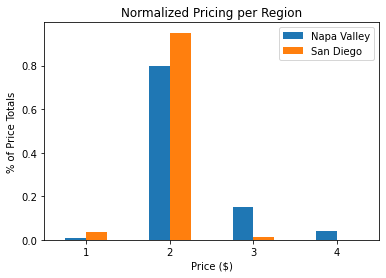

In [55]:
# Making a grouped bar chart for each city after normalizing the prices
norm_pricing = combined.groupby('City')['price_converted'].value_counts(normalize=True).to_frame().unstack(0, fill_value=0)
norm_pricing.plot(kind='bar')
legend = plt.legend()
legend.get_texts()[0].set_text('Napa Valley')
legend.get_texts()[1].set_text('San Diego')
plt.xlabel('Price ($)')
plt.xticks(rotation = 0)
plt.ylabel('% of Price Totals')
plt.title('Normalized Pricing per Region');

**A2:** Based on our Prices per Region chart, we can see that both regions favor the two-dollar-sign market. The chart also reflects the market for higher-priced wineries in Napa Valley and the lack in the San Diego area. **The lack of higher-priced wineries in San Diego indicates a potentially underserved market.**

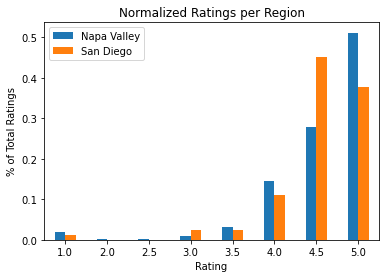

In [54]:
# Making a grouped bar chart for each city after normalizing the ratings
norm_rating = combined.groupby('City')['rating'].value_counts(normalize=True).to_frame()
norm_rating.unstack(0).plot(kind='bar')
legend = plt.legend()
legend.get_texts()[0].set_text('Napa Valley')
legend.get_texts()[1].set_text('San Diego')
plt.xticks(rotation = 0)
plt.xlabel('Rating')
plt.ylabel('% of Total Ratings')
plt.title('Normalized Ratings per Region');

**A3:** This normalized chart shows the ratings per region, demonstrating the difference in ratings between the two regions. **Based on this chart, we can see there are fewer 5-star ratings than 4.5-stars; this indicates there are customers who are not fully satisfied and may be willing to try a new winery.**

# Conclusion

Our analysis leads us to recommend the San Diego area as the better location for a new winery.

Additional steps to take include:

* **Evaluating the cost of real estate in each region:** Wineries and vineyards require a large amount of space, and due to the popularity of San Diego, prices may be higher than Napa Valley.


* **Reviewing the performance statistics of California wineries post-COVID19:** prior to COVID19, California wineries faced the challenge of higher supply in comparison to the demand. With the return of weddings and large gatherings, demand will increase, but it may not be enough to resolve the over-supply. [Reference.](https://www.svb.com/trends-insights/reports/wine-report#:~:text=2020%20began%20with%20declining%20volume,even%20with%20the%20prior%20year.)


* **Determine sales and marketing directions - shift towards direct-to-consumer sales:** COVID19 spurred a change in where and how people get their wine. If the market moves away from tasting rooms and wineries, the business will need to emphasize their online presence.